In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/driver-data.csv', index_col='id')
df.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [5]:
print("Cluster's Center\n")
print(kmeans.cluster_centers_)

Cluster's Center

[[ 49.9799964    5.22434282]
 [180.34311782  10.52011494]
 [ 50.49167849  32.49172577]
 [177.83509615  70.28846154]]


Count of each cluster
{0: 2775, 1: 696, 2: 425, 3: 104}
Inertia

719603.9690822506
Data with clusters

            mean_dist_day  mean_over_speed_perc  cluster
id                                                      
3423311935          71.24                    28        2
3423313212          52.53                    25        2
3423313724          64.54                    27        2
3423311373          55.69                    22        2
3423310999          54.58                    25        2
...                   ...                   ...      ...
3423310685         160.04                    10        1
3423312600         176.17                     5        1
3423312921         170.91                    12        1
3423313630         176.14                     5        1
3423311533         168.03                     9        1

[4000 rows x 3 columns]


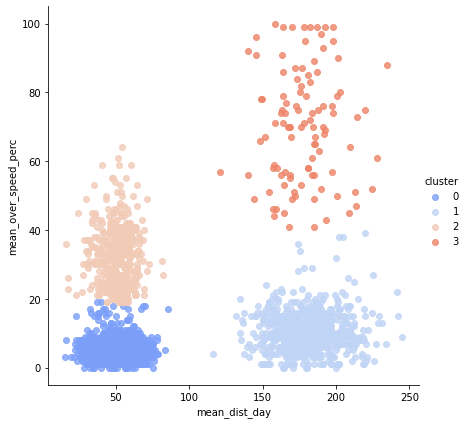

In [9]:
# Find count of each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print("Count of each cluster")
print(dict_data)


# Plot the clusters
df["cluster"] = kmeans.labels_
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=df,
           hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)


# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)
print("Inertia\n")
print(kmeans.inertia_)


# Print the data
print("Data with clusters\n")
print(df)